# Astro 530 - Homework 4 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from astropy import units as u
from astropy import constants as c
from scipy.integrate import simps

from astro530 import _trapz

In [3]:
plt.rcParams['axes.labelsize'] = 13
plt.rcParams['legend.fontsize'] = 12

In [73]:
def NIntegrate(func, a, b, density, log = True, unit = None, integrator = _trapz, **kwargs):
    '''
        Now improved to have log-spaced bins!
        func - function to numerically integrate
        a - lower bound
        b - upper bound
        density - number of subintervals per unit 
    '''
    n = round((b - a) * density)
    
    if log:
        x = np.logspace(a, b, n)
        if unit != None:
            x *= unit
        y = x * func(x, **kwargs)
        x = np.log(x)
    else:
        x = np.linspace(a, b, n)
        if unit != None:
            x *= unit
        y = func(x, **kwargs)
    
    return _trapz(y, x)

## 6. Exponential Integrals

### a) 

In [40]:
from scipy.special import expn, exp1

In [41]:
print(expn.__doc__)

expn(x1, x2, /, out=None, *, where=True, casting='same_kind', order='K', dtype=None, subok=True[, signature, extobj])

expn(n, x, out=None)

Generalized exponential integral En.

For integer :math:`n \geq 0` and real :math:`x \geq 0` the
generalized exponential integral is defined as [dlmf]_

.. math::

    E_n(x) = x^{n - 1} \int_x^\infty \frac{e^{-t}}{t^n} dt.

Parameters
----------
n: array_like
    Non-negative integers
x: array_like
    Real argument
out: ndarray, optional
    Optional output array for the function results

Returns
-------
scalar or ndarray
    Values of the generalized exponential integral

See Also
--------
exp1 : special case of :math:`E_n` for :math:`n = 1`
expi : related to :math:`E_n` when :math:`n = 1`

References
----------
.. [dlmf] Digital Library of Mathematical Functions, 8.19.2
          https://dlmf.nist.gov/8.19#E2

Examples
--------
>>> import scipy.special as sc

Its domain is nonnegative n and x.

>>> sc.expn(-1, 1.0), sc.expn(1, -1.0)
(nan, nan)

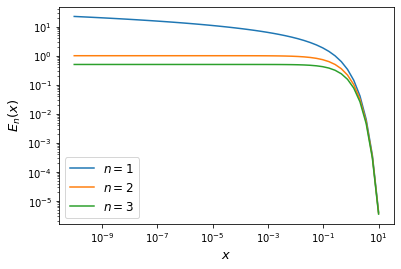

In [110]:
x = np.logspace(-10, 1)

plt.plot(x, expn(1, x), label = '$n = 1$')
plt.plot(x, expn(2, x), label = '$n = 2$')
plt.plot(x, expn(3, x), label = '$n = 3$')

plt.loglog()

plt.ylabel('$E_n(x)$')
plt.xlabel('$x$')
plt.legend()

plt.savefig('hw4_6a.1.png', bbox_inches = 'tight')
plt.show()

### b)

In [72]:
NIntegrate(exp1, -18, 2, 1000)

1.0

In [52]:
def expn_precision(n, lower, upper, density):

    def exp_n(x): return expn(n, x)
    
    true = 1 / n 
    calc = NIntegrate(exp_n, lower, upper, density)
    
    return np.abs(1 - calc/true)

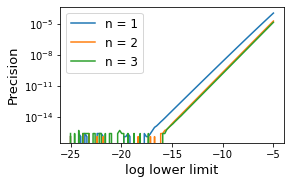

In [107]:
low = np.linspace(-25, -5, 100)

plt.figure(figsize = (4, 2.5))
for i in range(3):
    prec = [expn_precision(i + 1, a, 2, 1000) for a in low]
    plt.plot(low, prec, label = 'n = ' + str(i + 1))
    
plt.legend()
plt.semilogy()
plt.xlabel('log lower limit')
plt.ylabel('Precision')
plt.savefig('hw4_6.1.png', bbox_inches = 'tight')
plt.show()

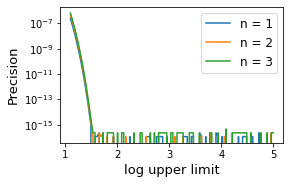

In [108]:
high = np.linspace(1.1, 5, 100)
plt.figure(figsize = (4, 2.5))
for i in range(3):
    prec = [expn_precision(i + 1, -18, b, 1000) for b in high]
    plt.plot(high, prec, label = 'n = ' + str(i + 1))
    
plt.legend()
plt.semilogy()
plt.xlabel('log upper limit')
plt.ylabel('Precision')
plt.savefig('hw4_6.2.png', bbox_inches = 'tight')
plt.show()

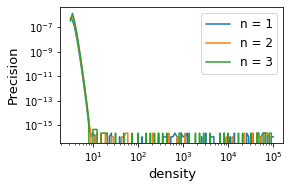

In [109]:
density = np.logspace(0.5, 5, 100)
plt.figure(figsize = (4, 2.5))
for i in range(3):
    prec = [expn_precision(i+1, -18, 2, d) for d in density]
    plt.plot(density, prec, label = 'n = ' + str(i + 1))
    
plt.legend()
plt.loglog()
plt.xlabel('density')
plt.ylabel('Precision')
plt.savefig('hw4_6.3.png', bbox_inches = 'tight')
plt.show()

## 8. Emergent Eddington Flux

In [154]:
def S_nu(t):
    return a0 + a1 * t + a2 * t ** 2

def H_integrand(t):
    return 1/2 * S_nu(t) * expn(2, t)

def H_nu():
    return NIntegrate(H_integrand, -18, 2, 100)

In [156]:
a0, a1 = 2, 1

for a2 in [2, 1, 0, -1]:
    print('a2 = ' + str (a2))
    print('Numerical calc.: ' + str(H_nu()))
    print('Analytical calc.: ' + str(a0/4 + a1/6 + a2/4))
    print('Precision: ' + str(np.abs(1 - H_nu()/(a0/4 + a1/6 + a2/4))))
    print('--------------')

a2 = 2
Numerical calc.: 1.1666666666666667
Analytical calc.: 1.1666666666666665
Precision: 2.220446049250313e-16
--------------
a2 = 1
Numerical calc.: 0.9166666666666665
Analytical calc.: 0.9166666666666666
Precision: 1.1102230246251565e-16
--------------
a2 = 0
Numerical calc.: 0.6666666666666666
Analytical calc.: 0.6666666666666666
Precision: 0.0
--------------
a2 = -1
Numerical calc.: 0.4166666666666667
Analytical calc.: 0.41666666666666663
Precision: 2.220446049250313e-16
--------------


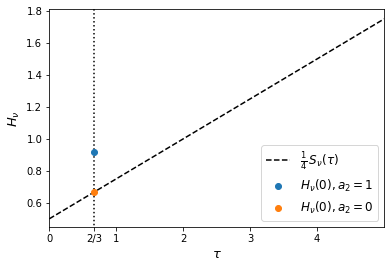

In [148]:
tau = np.linspace(0, 5)
plt.plot(tau, 1/4 * S_nu(tau), 'k--', label = r'$\frac{1}{4}\, S_\nu(\tau)$')

a2 = 1
plt.plot(2/3, H_nu(), 'o', label = r'$H_\nu(0), a_2 = 1$')

a2 = 0
plt.plot(2/3, H_nu(), 'o', label = r'$H_\nu(0), a_2 = 0$')

plt.vlines(2/3, 0, 2, 'k', ':', zorder = 0)
plt.xticks([0, 2/3, 1, 2, 3,4], [0, r'2/3', 1, 2, 3, 4])
plt.xlabel(r'$\tau$')
plt.ylabel(r'$H_\nu$')

plt.xlim(0, 5)
plt.ylim(0.45, 1.81)
plt.legend(loc = 'lower right')
plt.savefig('hw4_8.1.png')